In [1]:
#import libraries
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt 

In [2]:
import warnings 
warnings. filterwarnings('ignore')

In [53]:
#initialize data, perform linear regression

#define constants
n = 100
m = 11
mu = 0
#sigma_2 = 5
#sigma = np.sqrt(sigma_2)

#create matrices for storing data
x = np.zeros(n)
y = np.zeros(n)

def lineardatagenerator(n):
    random = np.random.uniform(0,1)
    noise = sigma*np.random.randn(n)
    x = np.random.rand(n)
    y = 36 * x + noise
    return x, y

def designmatrix(x_input,m):
    X = np.vstack([np.ones(np.size(x_input))]).T
    for i in range(m):
        X = np.vstack([X.T, x_input**(i+1)]).T
    return X

def designvector(x_input,m):
    dvector = np.vstack([1]).T
    for i in range(m):
        dvector = np.vstack([dvector.T, x_input**(i+1)]).T
    return dvector
    
def kernelfunction(x_i, x_value, index, m):
    dmatrix = designmatrix(x_i, m)
    dvector = designvector(x_value, m)
    kernel =  dvector @ np.linalg.inv(dmatrix.T @ dmatrix) @ dmatrix[:][index]
    return kernel

In [47]:
np.random.seed(seed=4803)
scalefactor = 1

x_i = 2*scalefactor*np.random.rand(n) - scalefactor

values = np.arange(-1,1, 0.01)

kernels = np.zeros((len(values),n))

for i in range(len(values)):
    for j in range(n):
        kernels[i][j] = kernelfunction(x_i, values[i], j, m)

Text(0.5, 0, 'K(x,x_i)')

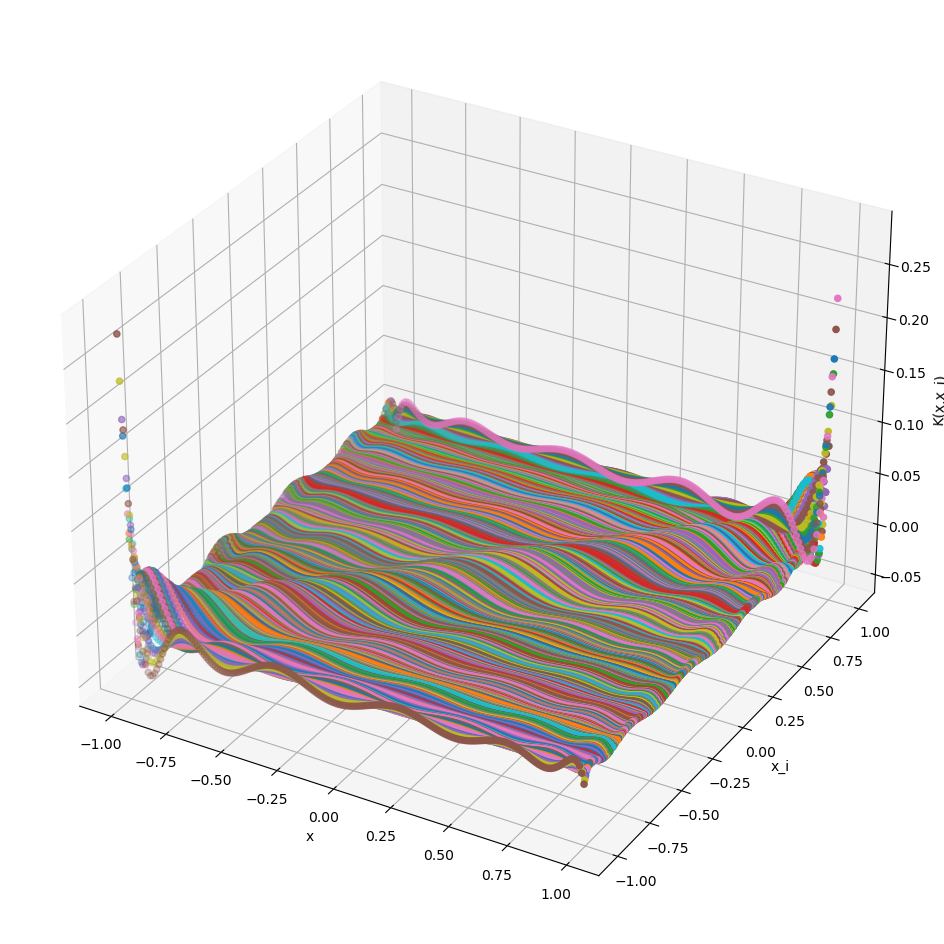

In [50]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
for i in range(n):
    ax.scatter(values, x_i[i], kernels[:,i])
ax.set_xlabel('x')
ax.set_ylabel('x_i')
ax.set_zlabel('K(x,x_i)')

In [66]:
np.random.seed(seed=4803)
scalefactor = 5

xx_i = 2*scalefactor*np.random.rand(n)

xvalues = np.linspace(-scalefactor,scalefactor, n)

xkernels = np.zeros((len(xvalues),n))

for i in range(len(xvalues)):
    for j in range(n):
        xkernels[i][j] = kernelfunction(xx_i, xvalues[i], j, m)

Text(0.5, 0, 'K(x,x_i)')

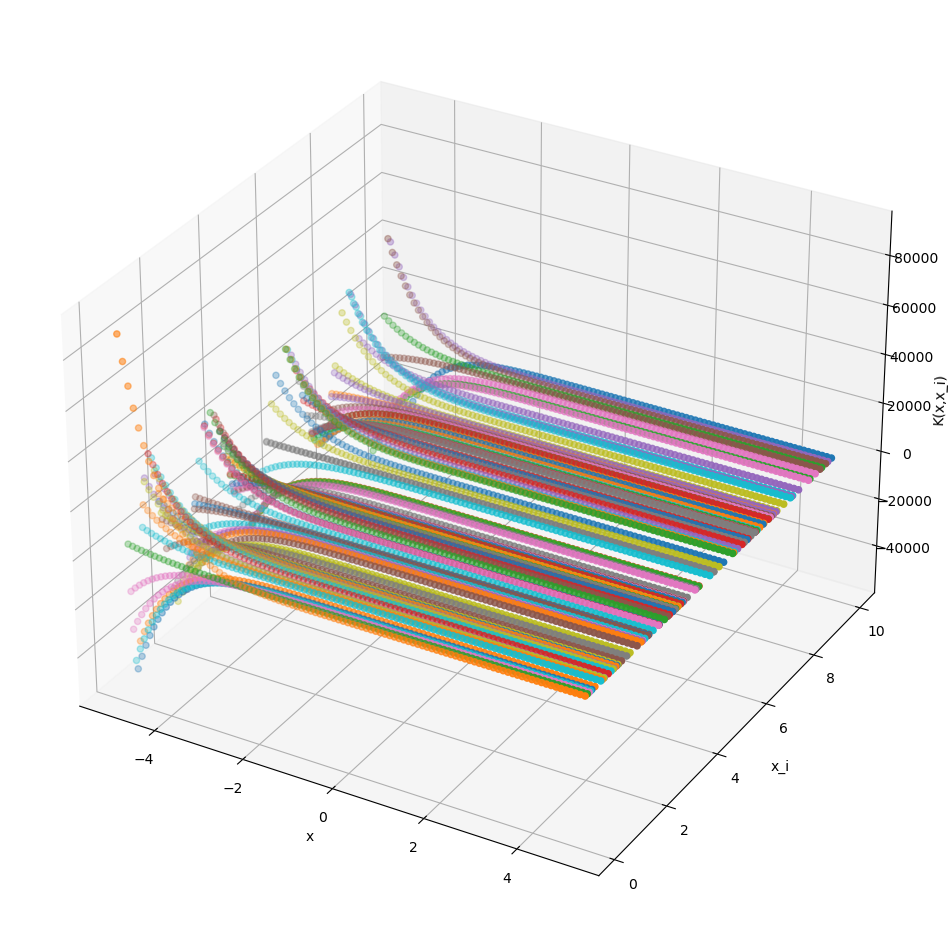

In [71]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
for i in range(n):
    ax.scatter(xvalues, xx_i[i], xkernels[:,i])
ax.set_xlabel('x')
ax.set_ylabel('x_i')
ax.set_zlabel('K(x,x_i)')

In [36]:
np.random.seed(seed=4803)
scalefactor = 5

nx_i = 2*scalefactor*np.random.rand(n) 

nvalues = np.arange(-1,1, 0.01)

nkernels = np.zeros((len(nvalues),n))

for i in range(len(nvalues)):
    for j in range(n):
        nkernels[i][j] = kernelfunction(nx_i, nvalues[i], j, m)

Text(0.5, 0, 'K(x,x_i)')

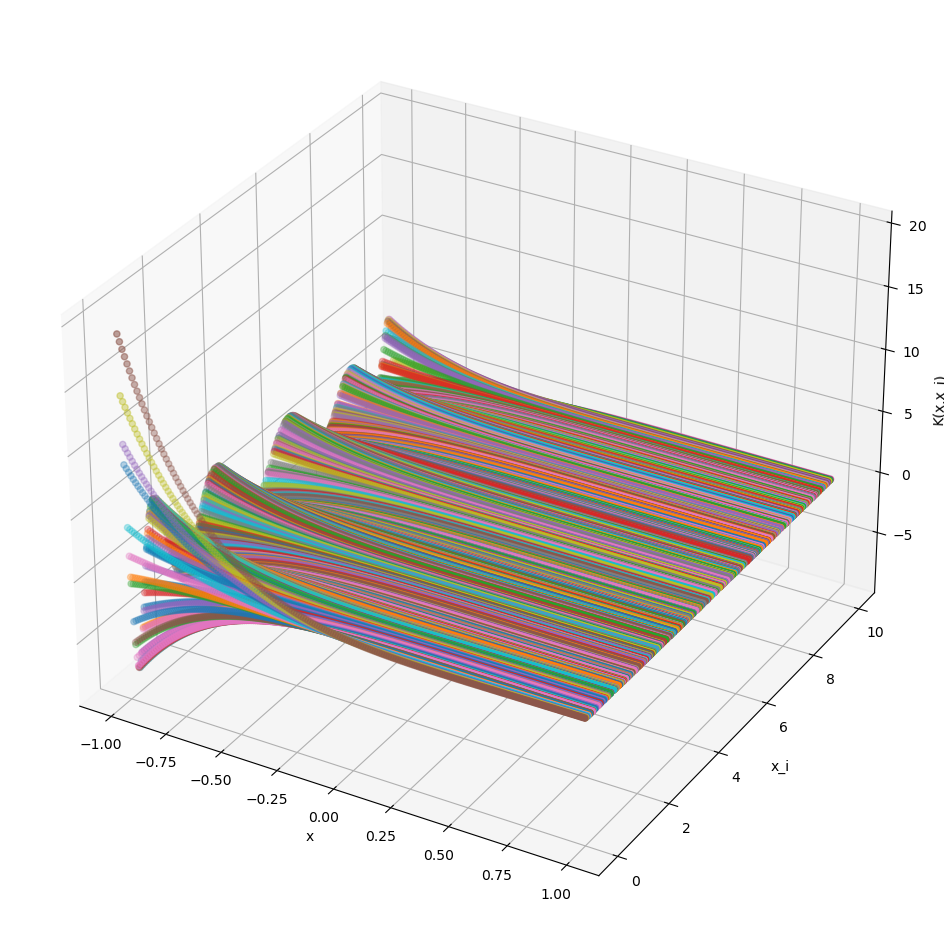

In [37]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
for i in range(n):
    ax.scatter(nvalues, nx_i[i], nkernels[:,i])
ax.set_xlabel('x')
ax.set_ylabel('x_i')
ax.set_zlabel('K(x,x_i)')

In [12]:
def ridgekernelfunction(x, x_value, index, m, lmbda):
    dmatrix = designmatrix(x, m)
    dvector = designvector(x_value, m)
    kernel = dvector @ np.linalg.inv(dmatrix.T @ dmatrix + lmbda * np.identity(m+1)) @ dmatrix[:][index]
    return kernel

ridgekernelfunction(x,0.5,31,10,1)

array([-1.83858917e-05])

Text(0.5, 0, 'K(x,x_i)')

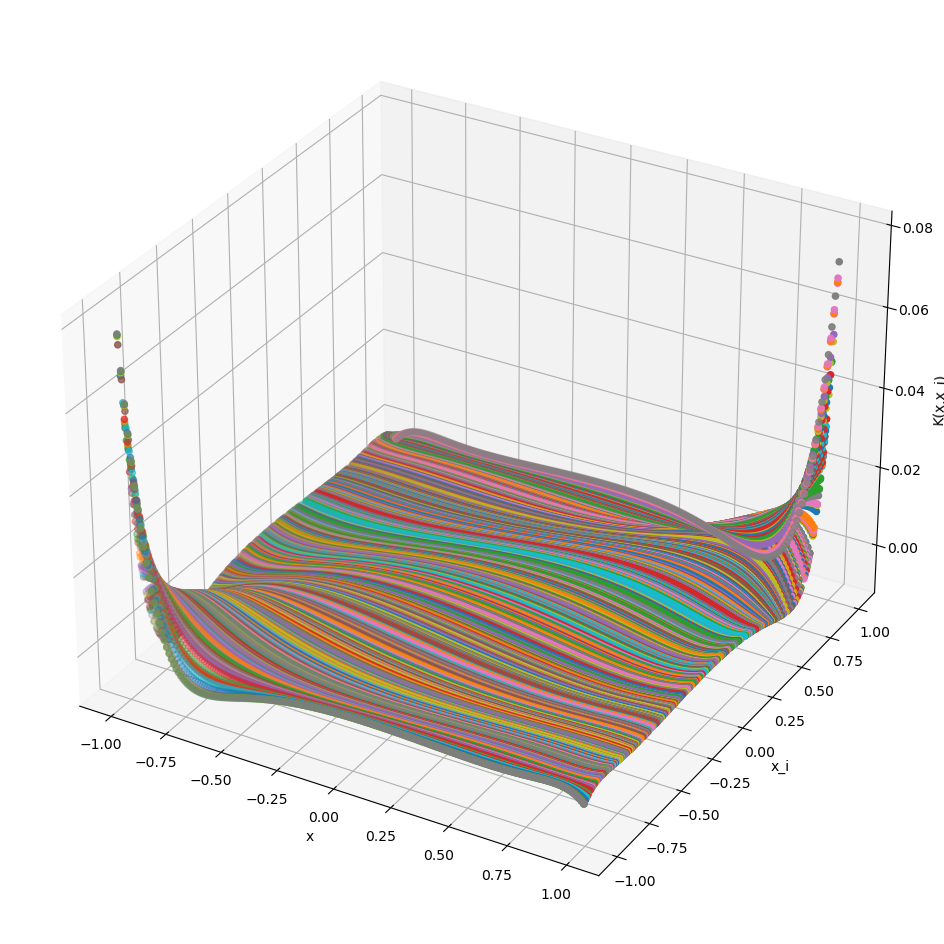

In [22]:
scalefactor = 1
polydeg1 = 11

rx = 2*scalefactor*np.random.rand(n) - scalefactor

rvalues = np.arange(-scalefactor,scalefactor, 0.01)

rkernels = np.zeros((len(values),n))

for i in range(len(values)):
    for j in range(n):
        r[i][j] = ridgekernelfunction(x, values[i], j, polydeg1, 5)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
for i in range(n):
    ax.scatter(rvalues, rx[i], rkernels[:,i])
ax.set_xlabel('x')
ax.set_ylabel('x_i')
ax.set_zlabel('K(x,x_i)')
#ax.view_init(30, 20)

Text(0.5, 0, 'K(x,x_i)')

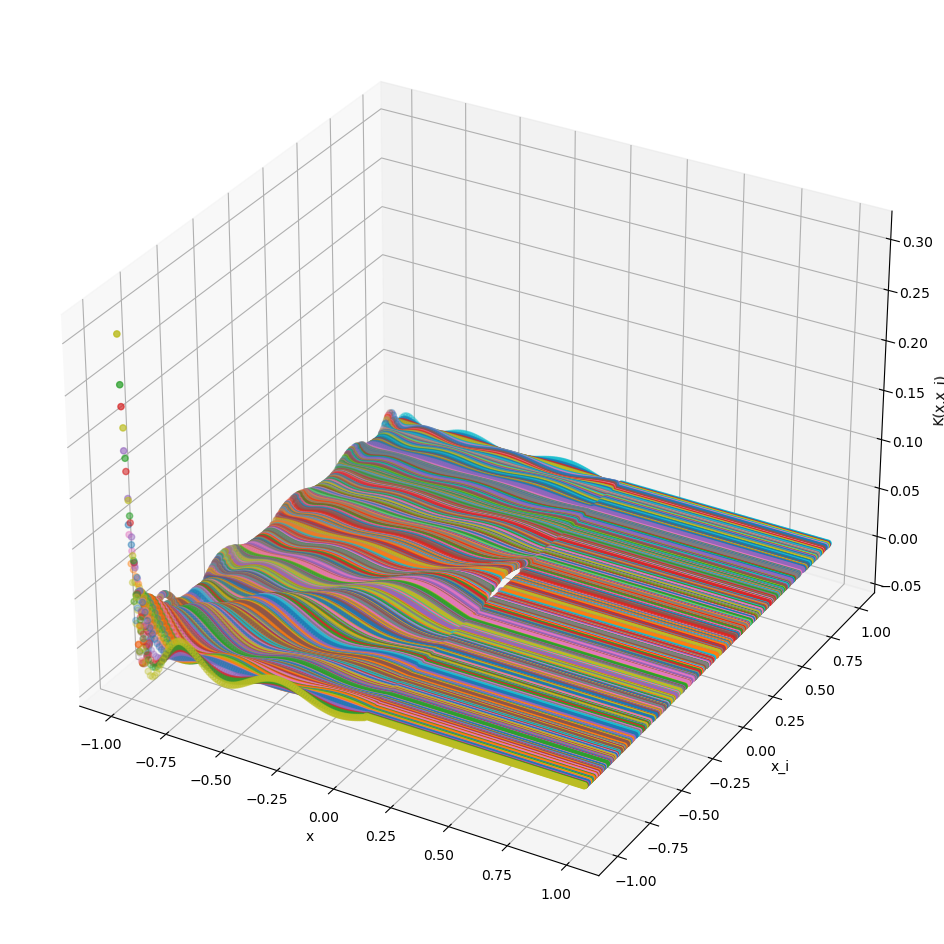

In [20]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
for i in range(n):
    ax.scatter(rvalues, rx[i], rkernels[:,i])
ax.set_xlabel('x')
ax.set_ylabel('x_i')
ax.set_zlabel('K(x,x_i)')